# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [142]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID", how="left")
# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [143]:
# Checking the number of mice.
combined_data["Mouse ID"].nunique()

249

In [144]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mouse_ids=combined_data.loc[combined_data.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_mouse_ids


array(['g989'], dtype=object)

In [145]:
# Optional: Get all the data for the duplicate mouse ID.
combined_data.loc[combined_data["Mouse ID"] == "g989"]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [146]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
combined_data = combined_data.loc[combined_data["Mouse ID"] != "g989"]
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [147]:
# Checking the number of mice in the clean DataFrame.
combined_data["Mouse ID"].nunique()

248

## Summary Statistics

In [148]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
regimen_mean=combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
regimen_median=combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
regimen_var=combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
regimen_std=combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
regimen_sem=combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
summary_stats_data=pd.DataFrame({"Mean Tumor Volume":regimen_mean,"Median Tumor Volume":regimen_median,"Tumor Volume Variance":regimen_var,"Tumor Volume Std.Dev":regimen_std,"Tumor Volume Std.Err":regimen_sem})
summary_stats_data

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std.Dev,Tumor Volume Std.Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [149]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = combined_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
summary_stats

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

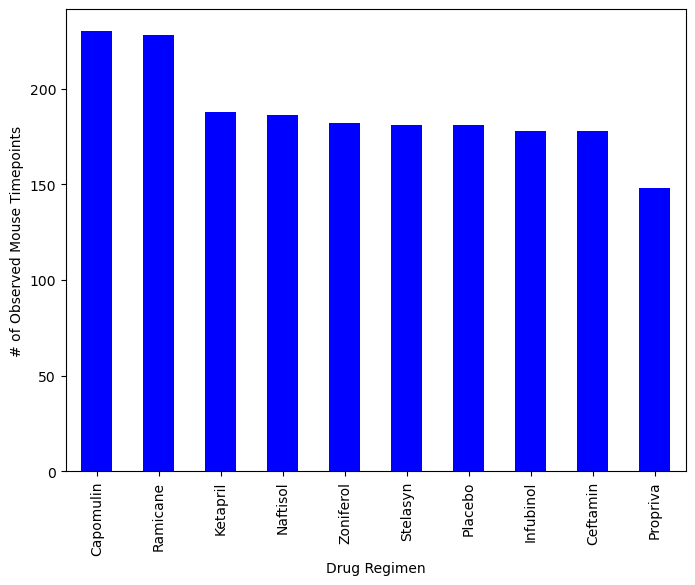

In [150]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
counts = combined_data['Drug Regimen'].value_counts()
figure1 = counts.plot(kind="bar", facecolor="blue", figsize=(8,6),xlabel="Drug Regimen",ylabel="# of Observed Mouse Timepoints")
plt.xticks(rotation="vertical")
plt.show()


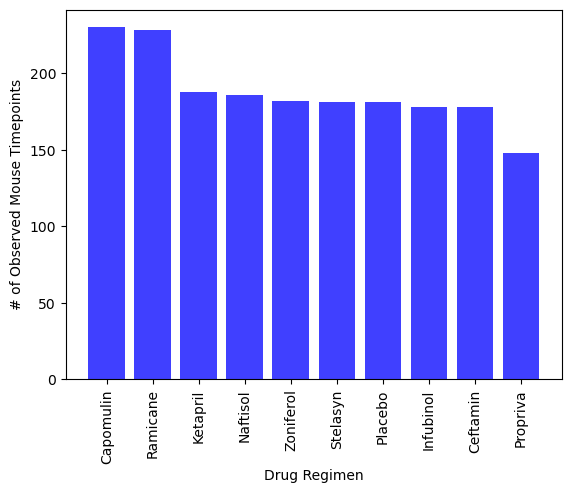

In [151]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
counts = combined_data['Drug Regimen'].value_counts()

plt.bar(counts.index,counts.values, color='b', alpha=0.75, align="center")
plt.xlabel("Drug Regimen")
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.show()

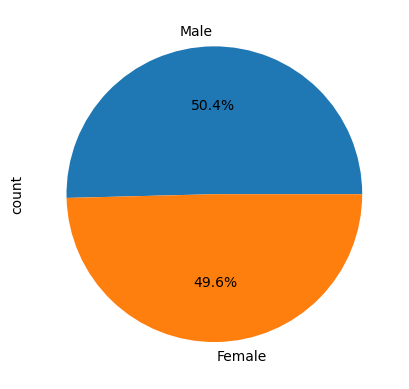

In [152]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_gender=combined_data.loc[:,["Mouse ID","Sex"]].drop_duplicates()





# Make the pie chart
counts = mice_gender["Sex"].value_counts()

counts.plot(kind="pie", autopct="%1.1f%%")
plt.ylabel("count")
plt.show()

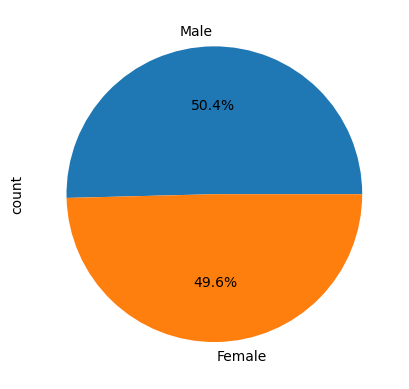

In [153]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
counts = mice_gender["Sex"].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.ylabel("count")


# Make the pie chart
plt.show()

## Quartiles, Outliers and Boxplots

In [154]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
for_regimens = combined_data.loc[combined_data["Drug Regimen"].isin(["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])]  

# Start by getting the last (greatest) timepoint for each mouse
for_regimens = for_regimens.sort_values("Timepoint", ascending=False).drop_duplicates(subset="Mouse ID")

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merge_regimens = pd.merge(for_regimens, combined_data, on=["Mouse ID","Timepoint","Drug Regimen","Tumor Volume (mm3)"], how="left")



In [155]:
# Put treatments into a list for for loop (and later for plot labels)

for regimen in ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]:
   
   
# Create empty list to fill with tumor vol data (for plotting)
    tumor_vol_data = merge_regimens.loc[merge_regimens["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    tumor_vol_data
    
# Calculate the IQR and quantitatively determine if there are any potential outliers.
    quartiles = tumor_vol_data.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)

    # Locate the rows which contain mice on each drug and get the tumor volumes


    # add subset


    # Determine outliers using upper and lower bounds
    outliers = tumor_vol_data.loc[(tumor_vol_data < lower_bound) | (tumor_vol_data > upper_bound)]
    print(f"{regimen} potential outliers: {outliers}")

Capomulin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers: 93    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/1g/693lzq6j3551yfr__wq655fm0000gn/T/ipykernel_28238/90415574.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(treatment_group_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


Text(0, 0.5, 'Final Tumor Volume (mm3)')

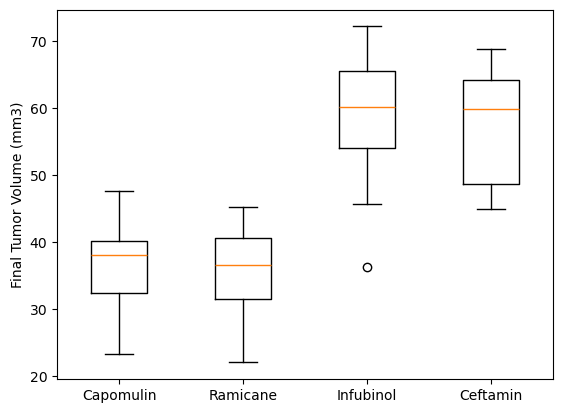

In [156]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
treatment_group_data=[merge_regimens.loc[merge_regimens["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"],
merge_regimens.loc[merge_regimens["Drug Regimen"] == "Ramicane", "Tumor Volume (mm3)"],
merge_regimens.loc[merge_regimens["Drug Regimen"] == "Infubinol", "Tumor Volume (mm3)"],
merge_regimens.loc[merge_regimens["Drug Regimen"] == "Ceftamin", "Tumor Volume (mm3)"],]
plt.boxplot(treatment_group_data, labels=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.ylabel("Final Tumor Volume (mm3)")

## Line and Scatter Plots

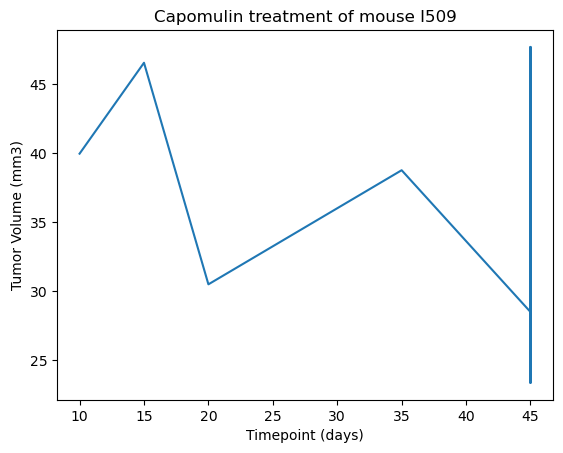

In [161]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
x_value= merge_regimens.loc[merge_regimens["Drug Regimen"] == "Capomulin","Timepoint"]
y_value= merge_regimens.loc[merge_regimens["Drug Regimen"] == "Capomulin", "Tumor Volume (mm3)"]
plt.plot(x_value, y_value)
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse I509")


plt.show()

Text(0, 0.5, 'Average Tumor Volume (mm3)')

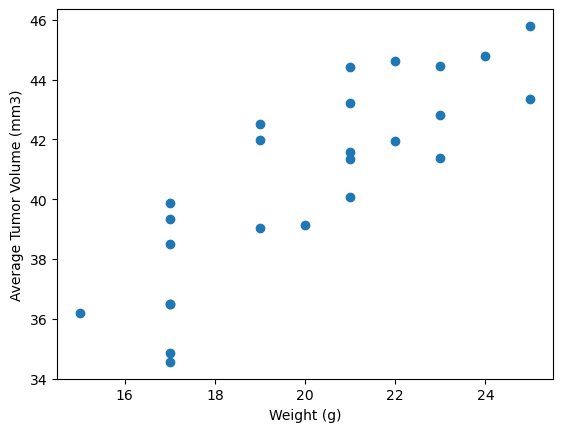

In [135]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin treatment regimen
capomulin_data= combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]
capomulin_average = capomulin_data.groupby("Mouse ID")[["Weight (g)","Tumor Volume (mm3)"]].mean()

plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


## Correlation and Regression

Text(20, 36, 'y = 0.95x + 21.55')

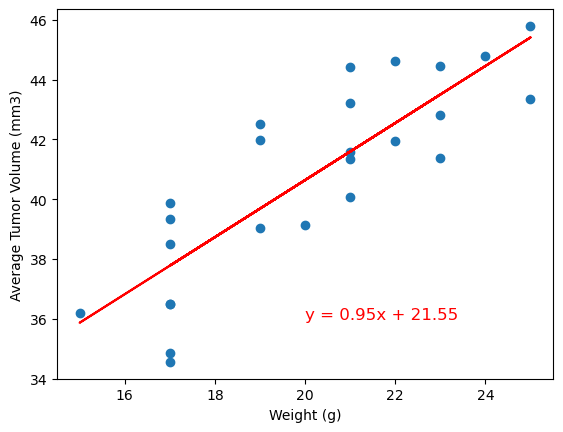

In [136]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
x_values = capomulin_average["Weight (g)"]
y_values = capomulin_average["Tumor Volume (mm3)"]
plt.scatter(capomulin_average["Weight (g)"], capomulin_average["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.plot(capomulin_average["Weight (g)"], intercept + slope * capomulin_average["Weight (g)"], "r-", label=line_eq)
plt.annotate(line_eq, (20, 36), fontsize=12, color="red")